In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [3]:
import tensorflow as tf
import os
import numpy as np

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**Removing Low quality images less than 10kb and other image formats**


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt


In [8]:
data_dir ="/content/drive/MyDrive/Ac & Pc images/Aadhaaar pan card images"

In [9]:
image_extension=['jpeg','jpg','bmp','png']

In [10]:
os.listdir(os.path.join(data_dir,'Aadhar card images'))

['adhar-card-enrollment-centers-peeplu-tonk-aadhaar-card-agents-iqphud9ifj.jpg',
 'aadhaar-card1-66.jpg',
 'aadhaar_card11-sixteen_nine.jpg',
 'pre-printed-aadhar-card-500x500.jpg',
 'How-to-link-income-tax-PAN-card-with-Aadhar-card-online.jpg',
 'adhar-card-centre-dwarka-sector-3-dwarka-sector-3-delhi-0f1ksesyv4.jpg',
 '613b1f91b195318100f7d27e_aadhar20card402x-min.jpg',
 'banner.jpg',
 'aadhar-card_story_647_081115041729.jpg',
 'images120.jpg',
 'images147.jpg',
 'images88.jpg',
 'images73.jpg',
 'images107.jpg',
 'images146.jpg',
 'images137.jpg',
 'images96.jpg',
 'images139.jpg',
 'images124.jpg',
 'images72.jpg',
 'images108.jpg',
 'images125.jpg',
 '56859-aadhaar-address-update.png',
 'images158.jpg',
 'images86.jpg',
 'images151.jpg',
 'images92.jpg',
 'Aadhar_Card_1200x768.jpeg',
 'images74.jpg',
 'images126.jpg',
 'images103.jpg',
 'images113.jpg',
 'images98.jpg',
 'images85.jpg',
 'images84.jpg',
 'images71.jpg',
 '981740-untitled-design-2021-10-22t213922.907.png',
 '162879

In [11]:
os.listdir(os.path.join(data_dir,'Pan card images'))

['pan-card-paper-pouch-envelope-500x500.jpg',
 'depositphotos_246867152-stock-photo-aadhar-card-pan-card-which.jpg',
 'pan_card_1572347484817_1594952330006.JPG.jpg',
 'pan_card-k4GG--621x414LiveMint_1573017006699.jpg',
 '18.-How-To-Check-TDS-Status-By-Pan-Card_.jpg',
 'Is-your-PAN-Card-Safe.png',
 'How-does-One-Start-a-PAN-Card-Centre_.jpg',
 'PAN-Card-Mistakes.jpg',
 'image33.jpg',
 'dde1c55a3edce74beda6a75004a2723f_original.jpg',
 'Screen-Shot-2018-09-10-at-2.29.19-PM-1-300x222.png',
 'PAN-Card-Verification-API-.png',
 'images45.jpg',
 'pan_card.jpeg',
 '1000_F_251012834_WMBWxNFbf42QerSskwe722wWb20MbDny.jpg',
 'pan-card-500x500.jpg',
 '613b4de97ccfb83ccceb5ad4_5f9ceae79d8e916b1cd98455_pancard403x-min.jpg',
 '152019-pan-ians.jpg',
 'images47.jpg',
 'images36.jpg',
 'PAN-card-Your-complete-guide-to-its-uses-and-application-process.jpg',
 'pvc-pan-card-printing-software-500x500.jpg',
 'pan_card_0.jpeg',
 'pancard_660_082718012425.jpg',
 'images44.jpg',
 'PAN_1658729157347_1658729165958_

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extension: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

In [13]:
aa=cv2.imread(os.path.join(data_dir,'Pan card images','/content/drive/MyDrive/Ac & Pc images/Aadhaaar pan card images/Pan card images/1000_F_251012834_WMBWxNFbf42QerSskwe722wWb20MbDny.jpg'))

In [14]:
aa.shape

(667, 1000, 3)

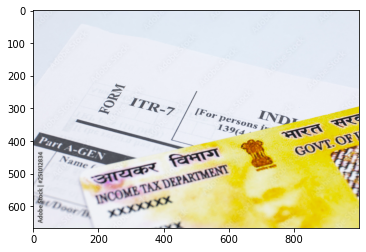

In [15]:
plt.imshow(aa)#it reads in different format so we can use to view proper colour we can change it
plt.show()

**Load Data**

In [16]:
tf.data.Dataset??

In [17]:
import numpy as np

In [18]:
#preprocess data in default state of 32 batch size and image size 256*256
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 958 files belonging to 2 classes.


In [19]:
tf.keras.utils.image_dataset_from_directory??

In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

In [22]:
#images and labels
len(batch)

2

In [23]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [24]:
#1 is assigned to pan card
#0 is assigned to aadhaar card
batch[1] 

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int32)

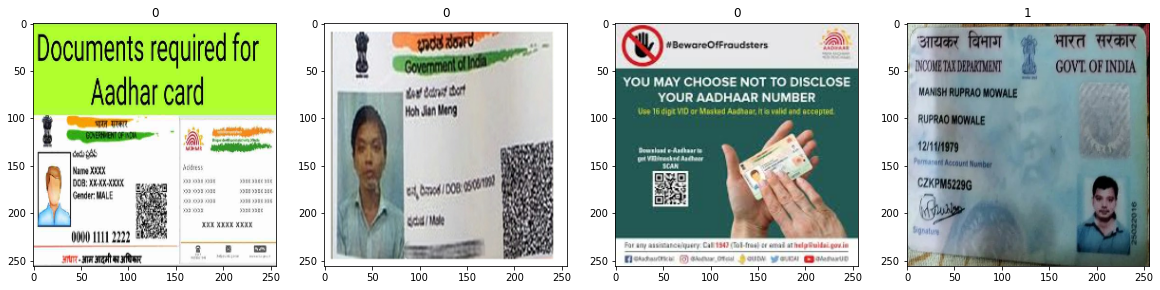

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Scaling Data**

In [26]:
data= data.map(lambda x,y:(x/255,y))

In [27]:
scaled=data.as_numpy_iterator()

In [28]:
scaled.next()[0].min()

0.0

Split data

In [29]:
len(data) #8 batches and each batch will have 32 images

30

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [31]:
test_size

3

In [32]:
#from tensorflow documentation
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
len(train)

21

Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**Train**

In [39]:
logdir='log'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
21/21 [==============================] - 20s 711ms/step - loss: 0.8837 - accuracy: 0.5744 - val_loss: 0.6349 - val_accuracy: 0.5469
Epoch 2/40
21/21 [==============================] - 16s 719ms/step - loss: 0.5645 - accuracy: 0.7247 - val_loss: 0.4348 - val_accuracy: 0.8073
Epoch 3/40
21/21 [==============================] - 20s 890ms/step - loss: 0.4624 - accuracy: 0.7887 - val_loss: 0.4036 - val_accuracy: 0.8646
Epoch 4/40
21/21 [==============================] - 18s 809ms/step - loss: 0.4134 - accuracy: 0.8036 - val_loss: 0.4232 - val_accuracy: 0.8438
Epoch 5/40
21/21 [==============================] - 16s 717ms/step - loss: 0.3669 - accuracy: 0.8497 - val_loss: 0.3304 - val_accuracy: 0.8802
Epoch 6/40
21/21 [==============================] - 16s 715ms/step - loss: 0.2891 - accuracy: 0.9033 - val_loss: 0.3536 - val_accuracy: 0.8438
Epoch 7/40
21/21 [==============================] - 16s 718ms/step - loss: 0.2797 - accuracy: 0.8973 - val_loss: 0.4242 - val_accuracy: 0.8333

In [42]:
#loss should go down and accuracy should increase

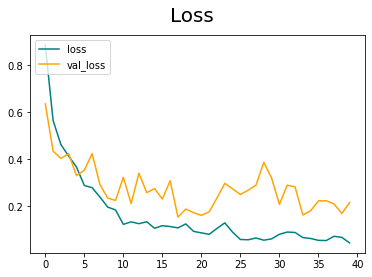

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

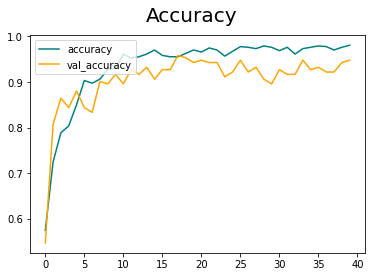

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [45]:
hist.history

{'loss': [0.8836638927459717,
  0.5645316243171692,
  0.4624290466308594,
  0.4133800268173218,
  0.3669200539588928,
  0.28912022709846497,
  0.27972495555877686,
  0.24005728960037231,
  0.19730597734451294,
  0.18521824479103088,
  0.12424546480178833,
  0.13466016948223114,
  0.1270270198583603,
  0.13517214357852936,
  0.10753581672906876,
  0.11843867599964142,
  0.11492346227169037,
  0.10917665809392929,
  0.12601950764656067,
  0.09443126618862152,
  0.08795060217380524,
  0.08203085511922836,
  0.1068267673254013,
  0.13038380444049835,
  0.09119321405887604,
  0.059995584189891815,
  0.0587538406252861,
  0.0663285106420517,
  0.056975994259119034,
  0.06264623999595642,
  0.08207603543996811,
  0.09156821668148041,
  0.08976727724075317,
  0.06820901483297348,
  0.06420856714248657,
  0.056372158229351044,
  0.05541558563709259,
  0.07356156408786774,
  0.0688839927315712,
  0.04543090611696243],
 'accuracy': [0.574404776096344,
  0.7247023582458496,
  0.788690447807312,
  

**Evaluate**

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 286ms/step


In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.97727275, shape=(), dtype=float32) tf.Tensor(0.95555556, shape=(), dtype=float32) tf.Tensor(0.9680851, shape=(), dtype=float32)


**Testing the model**

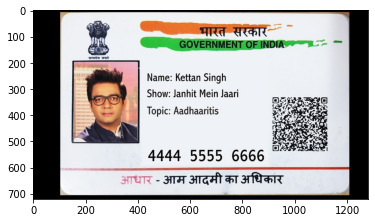

In [52]:
img = cv2.imread('/content/test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

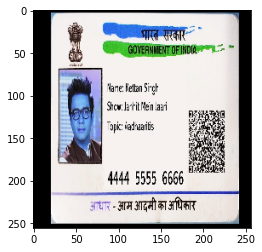

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 110ms/step


In [55]:
yhat

array([[5.275333e-07]], dtype=float32)

In [56]:
if yhat > 0.5: 
    print(f'Predicted class is Pan Card')
else:
    print(f'Predicted class is Aadhar Card')

Predicted class is Aadhar Card


Saving the Model

In [57]:
from tensorflow.keras.models import load_model

In [58]:
model.save(os.path.join('models','classifier.h5'))

In [59]:
new_model = load_model('/content/models/classifier.h5')

In [60]:
yhat_new=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 71ms/step


In [61]:
if yhat > 0.5: 
    print(f'Predicted class is Pan Card')
else:
    print(f'Predicted class is Aadhar Card')

Predicted class is Aadhar Card


In [64]:
from google.colab import files
files.download('/content/models/classifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>